In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

# ===== STEP 1: LOAD DATA =====
print("="*70)
print("STEP 1: LOADING DATA")
print("="*70)
df = pd.read_csv('weatherAUS.csv')
print(f"Original dataset shape: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")


STEP 1: LOADING DATA
Original dataset shape: (145460, 23)
Total missing values: 343248


In [2]:
print("="*80)
print("COMPREHENSIVE DATA VISUALIZATION & INSPECTION")
print("="*80)

# ===== 1. DATASET OVERVIEW =====
print("\n" + "="*80)
print("1. DATASET OVERVIEW")
print("="*80)
print(f"Total rows: {len(df):,}")
print(f"Total columns: {df.shape[1]}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes.value_counts()}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nBasic statistics:")
print(df.describe())


COMPREHENSIVE DATA VISUALIZATION & INSPECTION

1. DATASET OVERVIEW
Total rows: 145,460
Total columns: 23

Column names:
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

Data types:
float64    16
object      7
Name: count, dtype: int64

First few rows:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustS

In [3]:
# ===== 2. MISSING DATA ANALYSIS =====
print("\n" + "="*80)
print("2. MISSING DATA ANALYSIS")
print("="*80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df)) * 100,
    'Data_Type': df.dtypes.values
})
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
missing_data_filtered = missing_data[missing_data['Missing_Count'] > 0]

print(f"Total missing values: {df.isnull().sum().sum():,}")
print(f"Overall missing percentage: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")
print(f"Columns with missing data: {len(missing_data_filtered)}")



2. MISSING DATA ANALYSIS
Total missing values: 343,248
Overall missing percentage: 10.26%
Columns with missing data: 21


In [4]:
if len(missing_data_filtered) > 0:
    print("\nColumns with missing data:")
    print(missing_data_filtered.to_string(index=False))
    
    # Categorize by severity
    severe = missing_data_filtered[missing_data_filtered['Missing_Percentage'] > 40]
    high = missing_data_filtered[(missing_data_filtered['Missing_Percentage'] > 20) & 
                                  (missing_data_filtered['Missing_Percentage'] <= 40)]
    moderate = missing_data_filtered[(missing_data_filtered['Missing_Percentage'] > 5) & 
                                      (missing_data_filtered['Missing_Percentage'] <= 20)]
    low = missing_data_filtered[missing_data_filtered['Missing_Percentage'] <= 5]
    
    print(f"\nSeverity Breakdown:")
    print(f"  [SEVERE] (>40%): {len(severe)} columns")
    print(f"  [HIGH] (20-40%): {len(high)} columns")
    print(f"  [MODERATE] (5-20%): {len(moderate)} columns")
    print(f"  [LOW] (<5%): {len(low)} columns")




Columns with missing data:
       Column  Missing_Count  Missing_Percentage Data_Type
     Sunshine          69835           48.009762   float64
  Evaporation          62790           43.166506   float64
     Cloud3pm          59358           40.807095   float64
     Cloud9am          55888           38.421559   float64
  Pressure9am          15065           10.356799   float64
  Pressure3pm          15028           10.331363   float64
   WindDir9am          10566            7.263853    object
  WindGustDir          10326            7.098859    object
WindGustSpeed          10263            7.055548   float64
  Humidity3pm           4507            3.098446   float64
   WindDir3pm           4228            2.906641    object
      Temp3pm           3609            2.481094   float64
 RainTomorrow           3267            2.245978    object
     Rainfall           3261            2.241853   float64
    RainToday           3261            2.241853    object
 WindSpeed3pm           3062

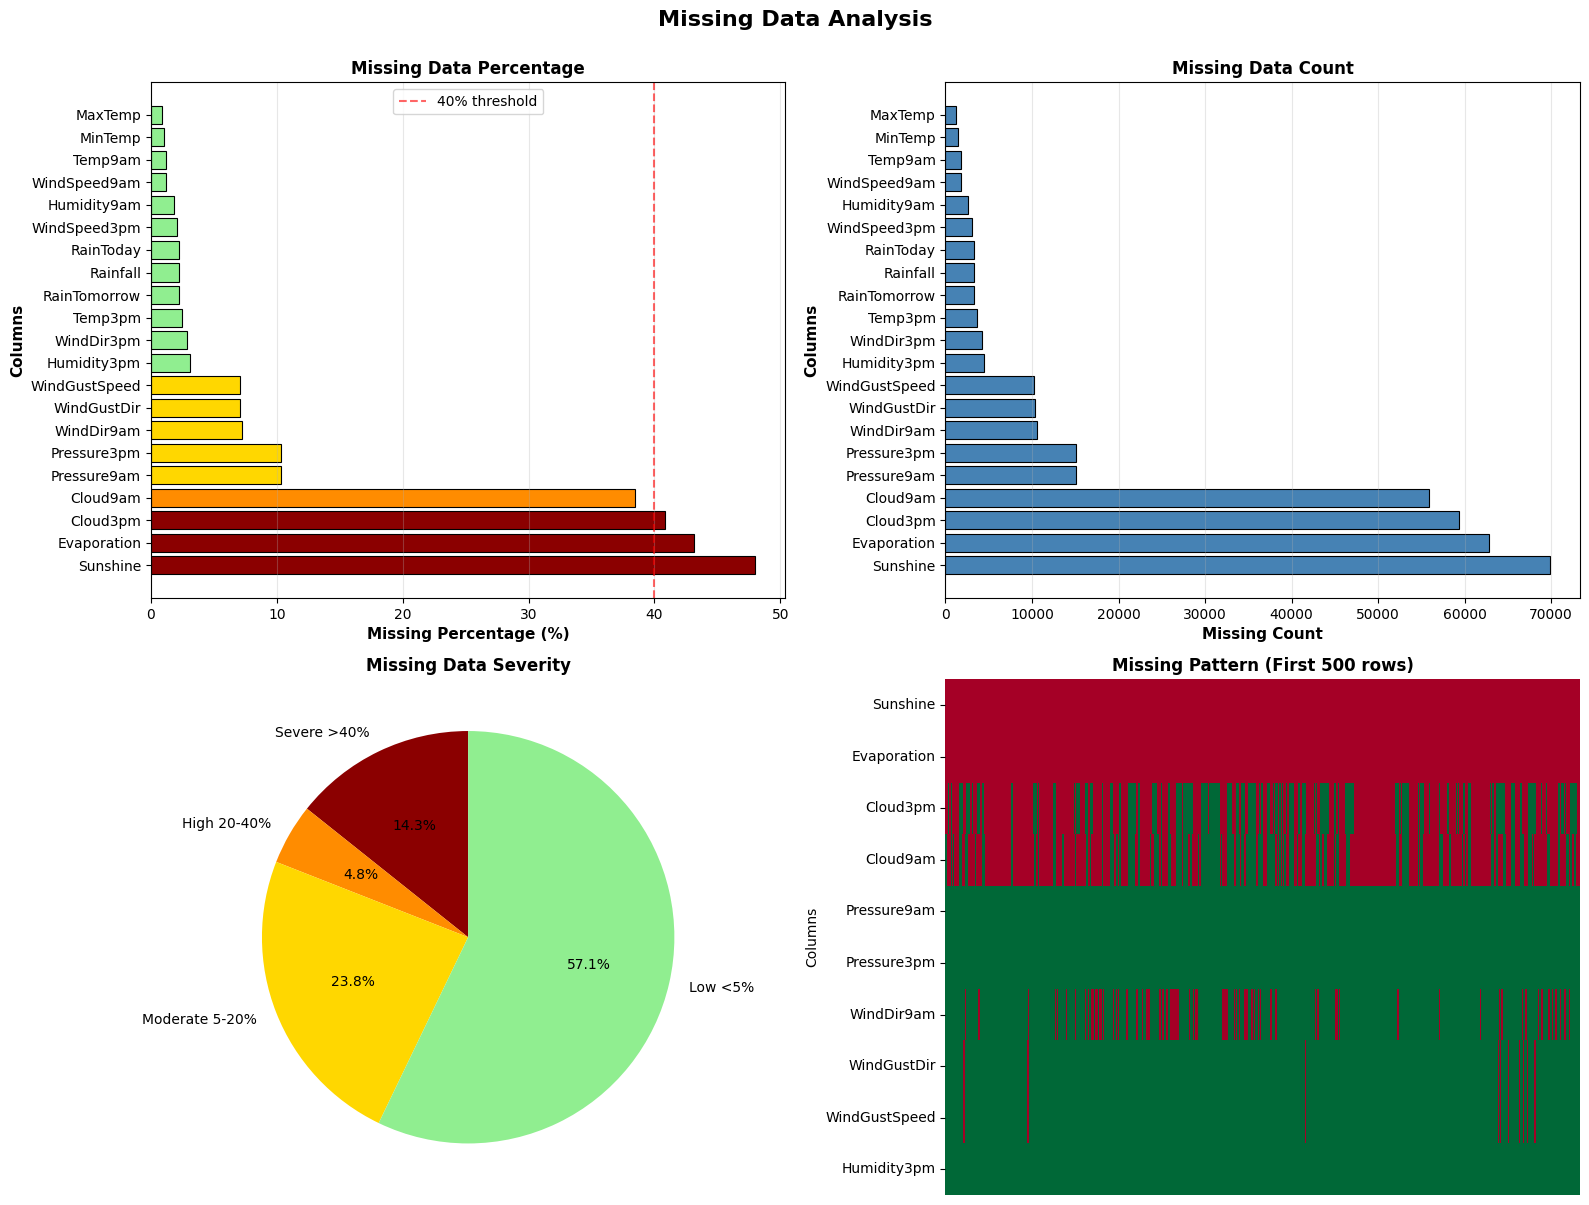

In [5]:

# Visualize missing data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Missing Data Analysis', fontsize=16, fontweight='bold', y=1.00)

if len(missing_data_filtered) > 0:
    # Plot 1: Missing percentage bar chart
    colors = ['darkred' if x > 40 else 'darkorange' if x > 20 else 'gold' if x > 5 else 'lightgreen' 
              for x in missing_data_filtered['Missing_Percentage']]
    axes[0, 0].barh(missing_data_filtered['Column'], missing_data_filtered['Missing_Percentage'], 
                    color=colors, edgecolor='black', linewidth=0.8)
    axes[0, 0].set_xlabel('Missing Percentage (%)', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Columns', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Missing Data Percentage', fontsize=12, fontweight='bold')
    axes[0, 0].axvline(x=40, color='red', linestyle='--', linewidth=1.5, alpha=0.6, label='40% threshold')
    axes[0, 0].legend()
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # Plot 2: Missing count
    axes[0, 1].barh(missing_data_filtered['Column'], missing_data_filtered['Missing_Count'], 
                    color='steelblue', edgecolor='black', linewidth=0.8)
    axes[0, 1].set_xlabel('Missing Count', fontsize=11, fontweight='bold')
    axes[0, 1].set_ylabel('Columns', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Missing Data Count', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='x', alpha=0.3)
    
    # Plot 3: Severity distribution
    severity_counts = [len(severe), len(high), len(moderate), len(low)]
    severity_labels = [f'Severe >40%', f'High 20-40%', f'Moderate 5-20%', f'Low <5%']
    severity_colors = ['darkred', 'darkorange', 'gold', 'lightgreen']
    non_zero = [(c, l, col) for c, l, col in zip(severity_counts, severity_labels, severity_colors) if c > 0]
    if non_zero:
        counts, labels, colors = zip(*non_zero)
        axes[1, 0].pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
        axes[1, 0].set_title('Missing Data Severity', fontsize=12, fontweight='bold')
    
    # Plot 4: Heatmap sample
    sample_size = min(500, len(df))
    cols_with_missing = missing_data_filtered['Column'].tolist()[:10]  # Top 10
    missing_matrix = df[cols_with_missing].head(sample_size).isnull().astype(int)
    sns.heatmap(missing_matrix.T, cmap='RdYlGn_r', ax=axes[1, 1], 
                yticklabels=cols_with_missing, xticklabels=False, cbar=False)
    axes[1, 1].set_title(f'Missing Pattern (First {sample_size} rows)', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Columns', fontsize=10)

plt.tight_layout()
plt.show()


In [6]:
# ===== 3. TARGET VARIABLE ANALYSIS (CLASS IMBALANCE) =====
print("\n" + "="*80)
print("3. TARGET VARIABLE ANALYSIS (CLASS IMBALANCE)")
print("="*80)

if 'RainTomorrow' in df.columns:
    target_counts = df['RainTomorrow'].value_counts()
    print(f"RainTomorrow distribution:")
    print(target_counts)
    print(f"\nClass Imbalance Ratio: {target_counts.iloc[0]/target_counts.iloc[1]:.2f}:1")
    print(f"Majority class: {target_counts.iloc[0]/len(df)*100:.2f}%")
    print(f"Minority class: {target_counts.iloc[1]/len(df)*100:.2f}%")
    


3. TARGET VARIABLE ANALYSIS (CLASS IMBALANCE)
RainTomorrow distribution:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Class Imbalance Ratio: 3.46:1
Majority class: 75.84%
Minority class: 21.91%


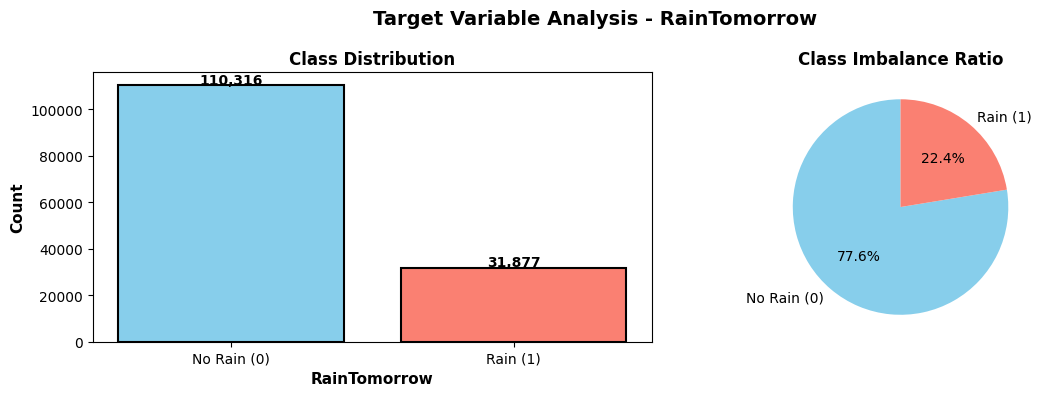

In [7]:

if 'RainTomorrow' in df.columns:

    # Visualize class imbalance
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Target Variable Analysis - RainTomorrow', fontsize=14, fontweight='bold')
    
    # Bar plot
    axes[0].bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon'], 
                edgecolor='black', linewidth=1.5)
    axes[0].set_xlabel('RainTomorrow', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
    axes[0].set_title('Class Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['No Rain (0)', 'Rain (1)'])
    for i, v in enumerate(target_counts.values):
        axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')
    
    # Pie chart
    axes[1].pie(target_counts.values, labels=['No Rain (0)', 'Rain (1)'], 
                autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
    axes[1].set_title('Class Imbalance Ratio', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    


In [8]:
# ===== 3. TARGET VARIABLE ANALYSIS (CLASS IMBALANCE) =====
print("\n" + "="*80)
print("3. TARGET VARIABLE ANALYSIS (CLASS IMBALANCE)")
print("="*80)

if 'RainToday' in df.columns:
    target_counts = df['RainToday'].value_counts()
    print(f"RainToday distribution:")
    print(target_counts)
    print(f"\nClass Imbalance Ratio: {target_counts.iloc[0]/target_counts.iloc[1]:.2f}:1")
    print(f"Majority class: {target_counts.iloc[0]/len(df)*100:.2f}%")
    print(f"Minority class: {target_counts.iloc[1]/len(df)*100:.2f}%")
    


3. TARGET VARIABLE ANALYSIS (CLASS IMBALANCE)
RainToday distribution:
RainToday
No     110319
Yes     31880
Name: count, dtype: int64

Class Imbalance Ratio: 3.46:1
Majority class: 75.84%
Minority class: 21.92%


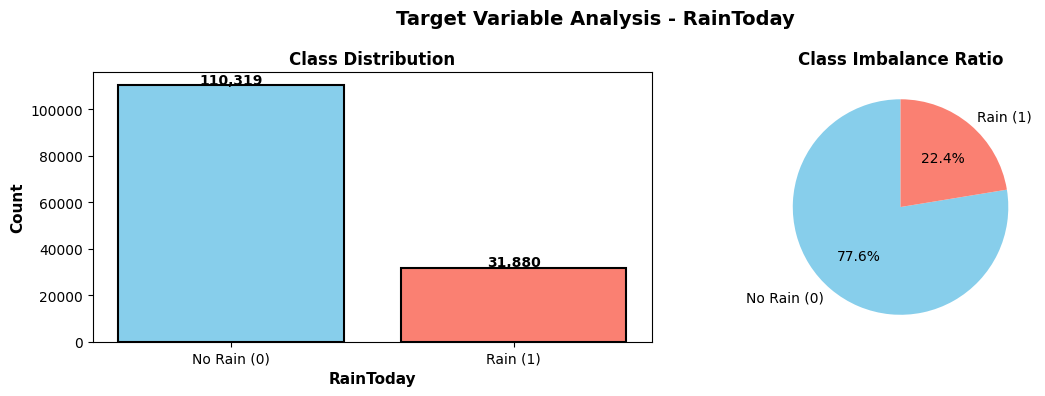

In [9]:

if 'RainToday' in df.columns:

    # Visualize class imbalance
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Target Variable Analysis - RainToday', fontsize=14, fontweight='bold')
    
    # Bar plot
    axes[0].bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon'], 
                edgecolor='black', linewidth=1.5)
    axes[0].set_xlabel('RainToday', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
    axes[0].set_title('Class Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['No Rain (0)', 'Rain (1)'])
    for i, v in enumerate(target_counts.values):
        axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')
    
    # Pie chart
    axes[1].pie(target_counts.values, labels=['No Rain (0)', 'Rain (1)'], 
                autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
    axes[1].set_title('Class Imbalance Ratio', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    


In [10]:

# ===== 4. NUMERICAL FEATURES DISTRIBUTION =====
print("\n" + "="*80)
print("4. NUMERICAL FEATURES DISTRIBUTION")
print("="*80)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Filter out one-hot encoded columns
numerical_cols = [col for col in numerical_cols if df[col].nunique() > 2]

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")




4. NUMERICAL FEATURES DISTRIBUTION
Numerical columns (16): ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


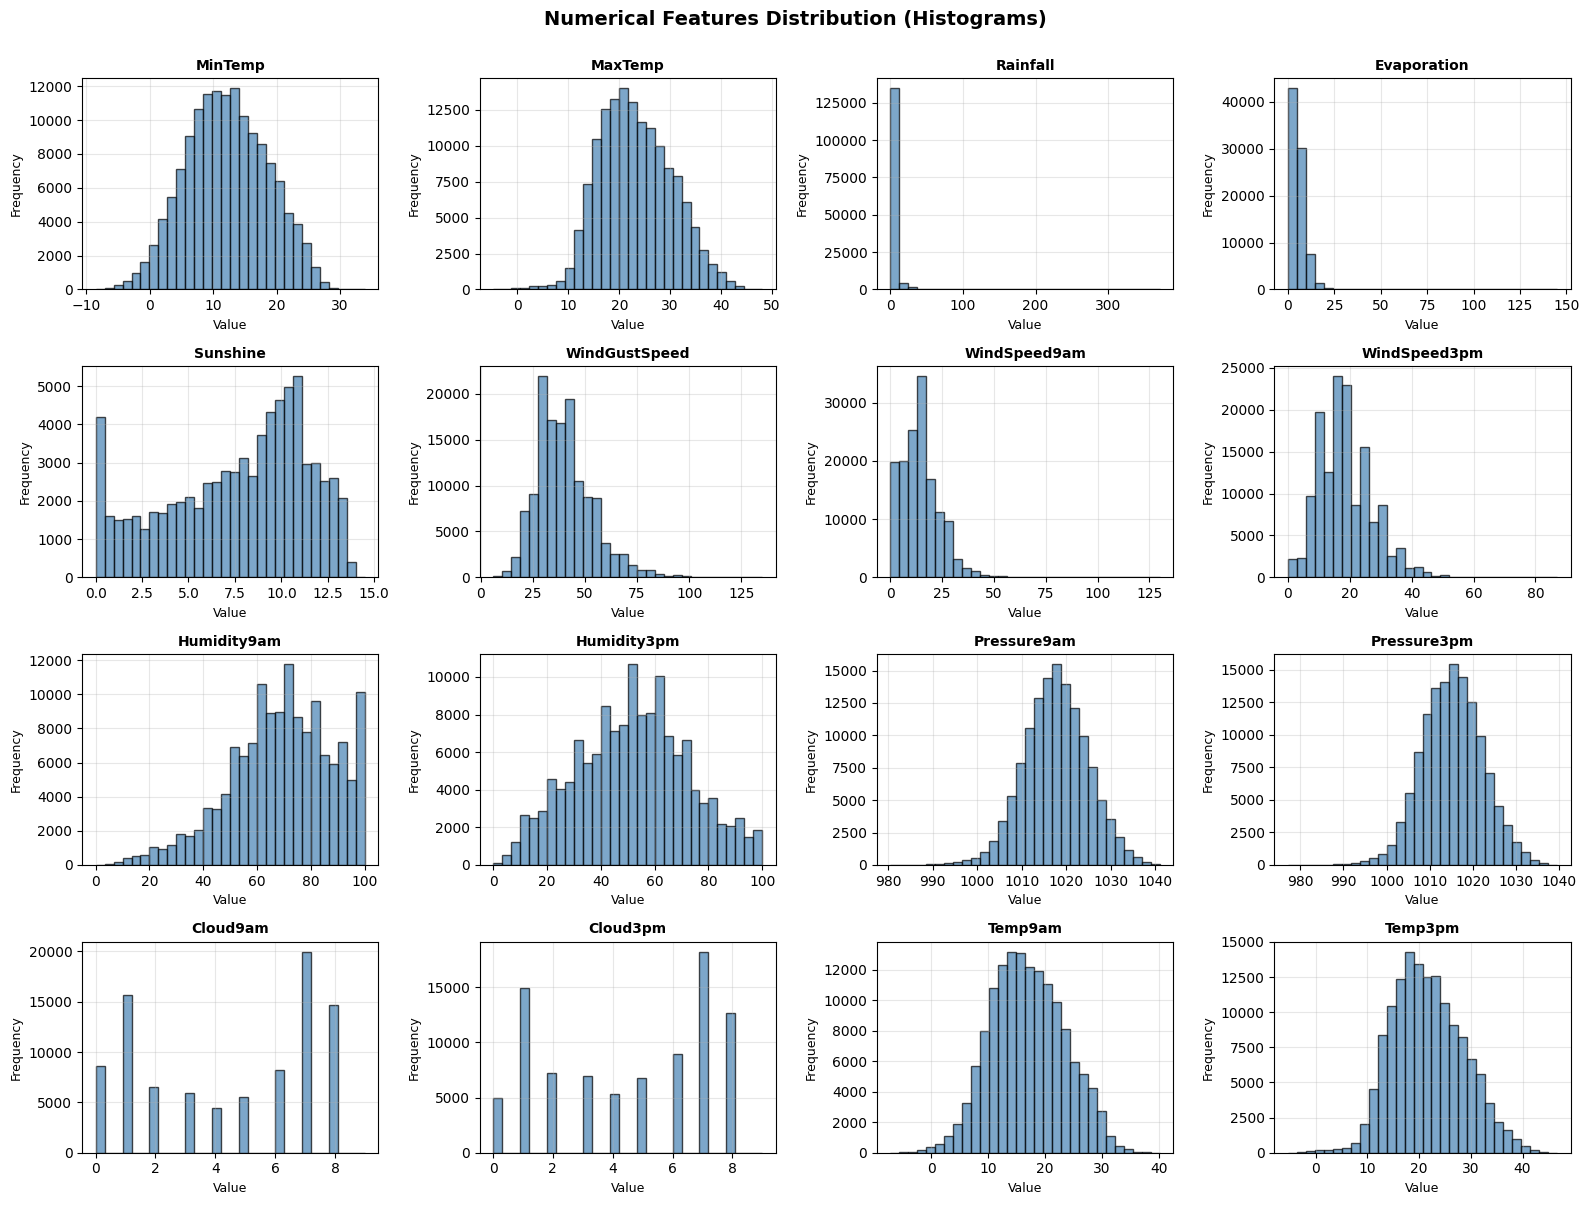

In [11]:
# Distribution plots
if len(numerical_cols) > 0:
    n_cols = 4
    n_rows = (len(numerical_cols[:16]) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*3))
    fig.suptitle('Numerical Features Distribution (Histograms)', fontsize=14, fontweight='bold', y=1.00)
    axes = axes.ravel() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, col in enumerate(numerical_cols[:16]):
        axes[i].hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(col, fontsize=10, fontweight='bold')
        axes[i].set_xlabel('Value', fontsize=9)
        axes[i].set_ylabel('Frequency', fontsize=9)
        axes[i].grid(alpha=0.3)
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


In [12]:
# ===== 5. OUTLIER DETECTION =====
print("\n" + "="*80)
print("5. OUTLIER DETECTION (IQR METHOD)")
print("="*80)

outlier_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': f'{outlier_pct:.2f}%',
        'Lower_Bound': f'{lower_bound:.2f}',
        'Upper_Bound': f'{upper_bound:.2f}'
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))




5. OUTLIER DETECTION (IQR METHOD)
      Feature  Outlier_Count Outlier_Percentage Lower_Bound Upper_Bound
      MinTemp             54              0.04%       -6.35       30.85
      MaxTemp            489              0.34%        2.45       43.65
     Rainfall          25578             17.58%       -1.20        2.00
  Evaporation           1995              1.37%       -4.60       14.60
     Sunshine              0              0.00%       -3.90       19.30
WindGustSpeed           3092              2.13%        5.50       73.50
 WindSpeed9am           1817              1.25%      -11.00       37.00
 WindSpeed3pm           2523              1.73%       -3.50       40.50
  Humidity9am           1425              0.98%       18.00      122.00
  Humidity3pm              0              0.00%       -6.50      109.50
  Pressure9am           1191              0.82%      998.65     1036.65
  Pressure3pm            919              0.63%      996.00     1034.40
     Cloud9am              0 

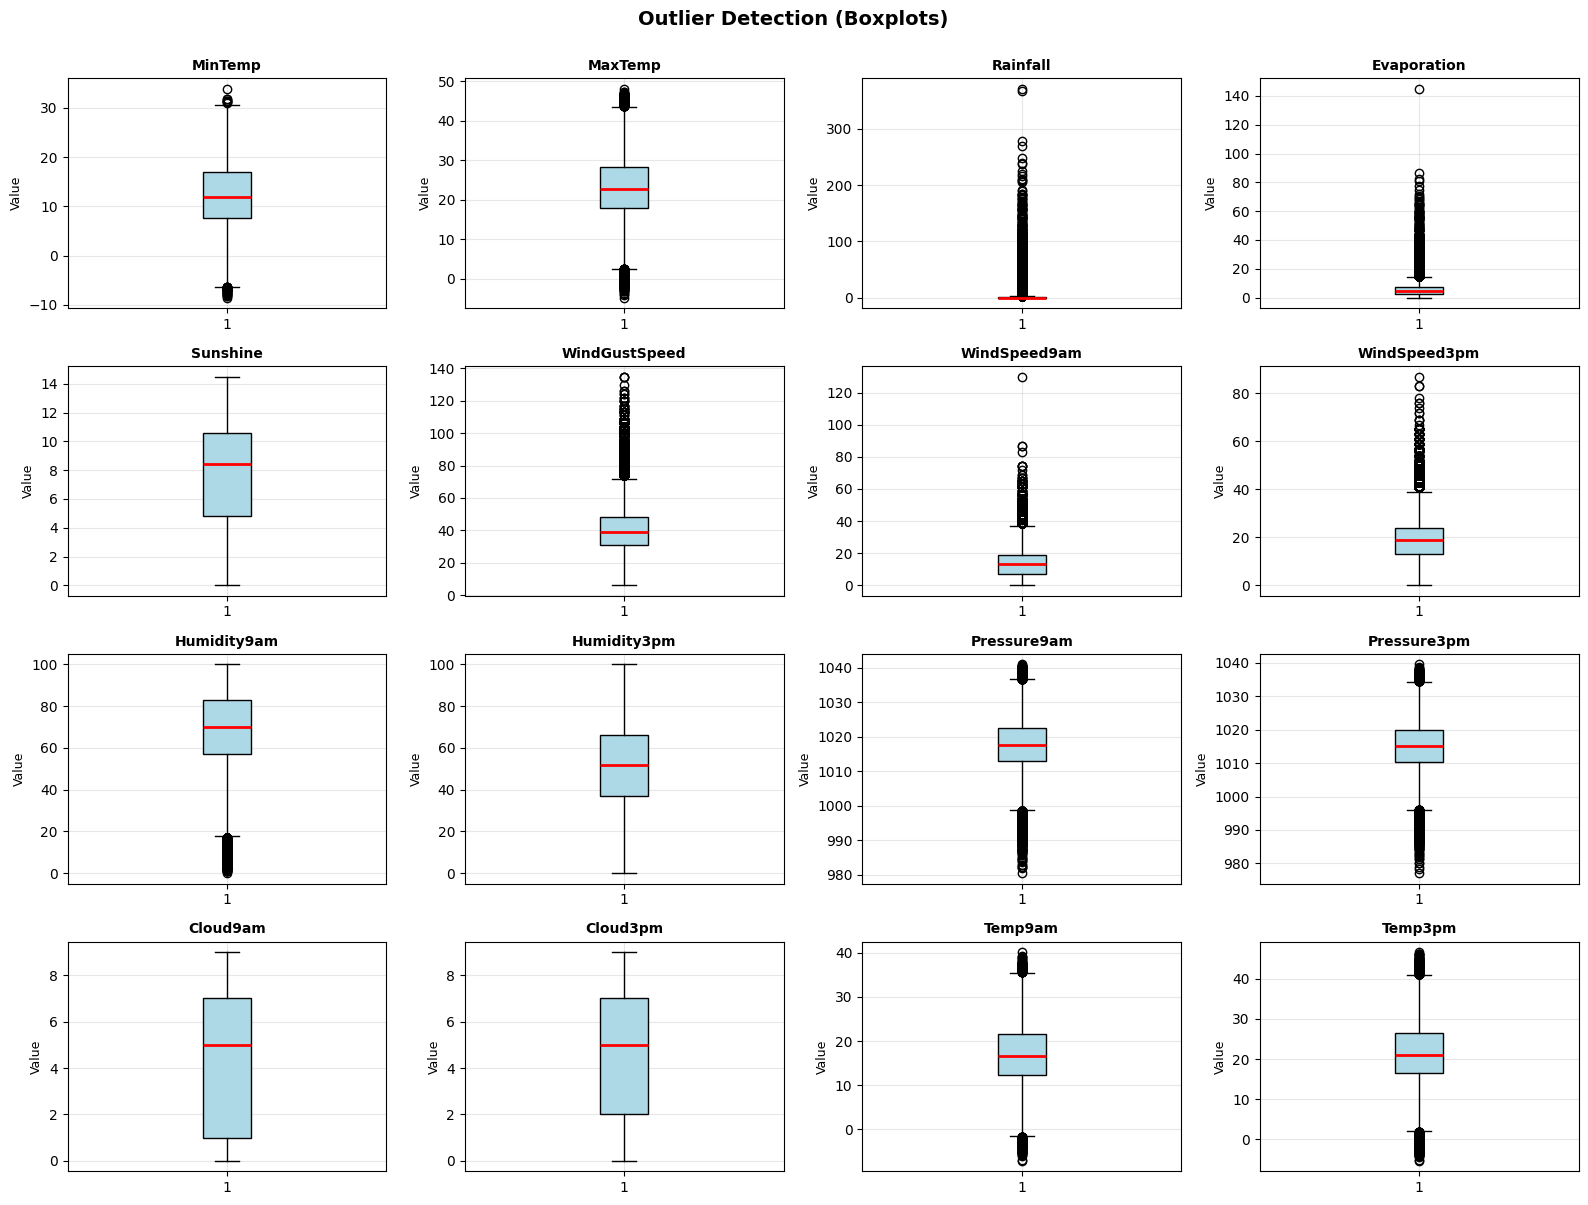

In [13]:
# Boxplots for outlier visualization
if len(numerical_cols) > 0:
    n_cols = 4
    n_rows = (len(numerical_cols[:16]) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*3))
    fig.suptitle('Outlier Detection (Boxplots)', fontsize=14, fontweight='bold', y=1.00)
    axes = axes.ravel() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, col in enumerate(numerical_cols[:16]):
        bp = axes[i].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                             boxprops=dict(facecolor='lightblue', edgecolor='black'),
                             medianprops=dict(color='red', linewidth=2),
                             whiskerprops=dict(color='black'),
                             capprops=dict(color='black'))
        axes[i].set_title(col, fontsize=10, fontweight='bold')
        axes[i].set_ylabel('Value', fontsize=9)
        axes[i].grid(alpha=0.3)
    
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


In [14]:
# ===== 6. CORRELATION ANALYSIS =====
print("\n" + "="*80)
print("6. CORRELATION ANALYSIS")
print("="*80)

if len(numerical_cols) > 0:
    correlation_matrix = df[numerical_cols].corr()
    
    print("Top 10 positive correlations (excluding self-correlation):")
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })
    corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)
    print(corr_df.head(10).to_string(index=False))
    


6. CORRELATION ANALYSIS
Top 10 positive correlations (excluding self-correlation):
    Feature_1    Feature_2  Correlation
      MaxTemp      Temp3pm     0.984503
  Pressure9am  Pressure3pm     0.961326
      MinTemp      Temp9am     0.901821
      MaxTemp      Temp9am     0.887210
      Temp9am      Temp3pm     0.860591
      MinTemp      MaxTemp     0.736555
      MinTemp      Temp3pm     0.708906
WindGustSpeed WindSpeed3pm     0.686307
  Humidity9am  Humidity3pm     0.666949
WindGustSpeed WindSpeed9am     0.605303


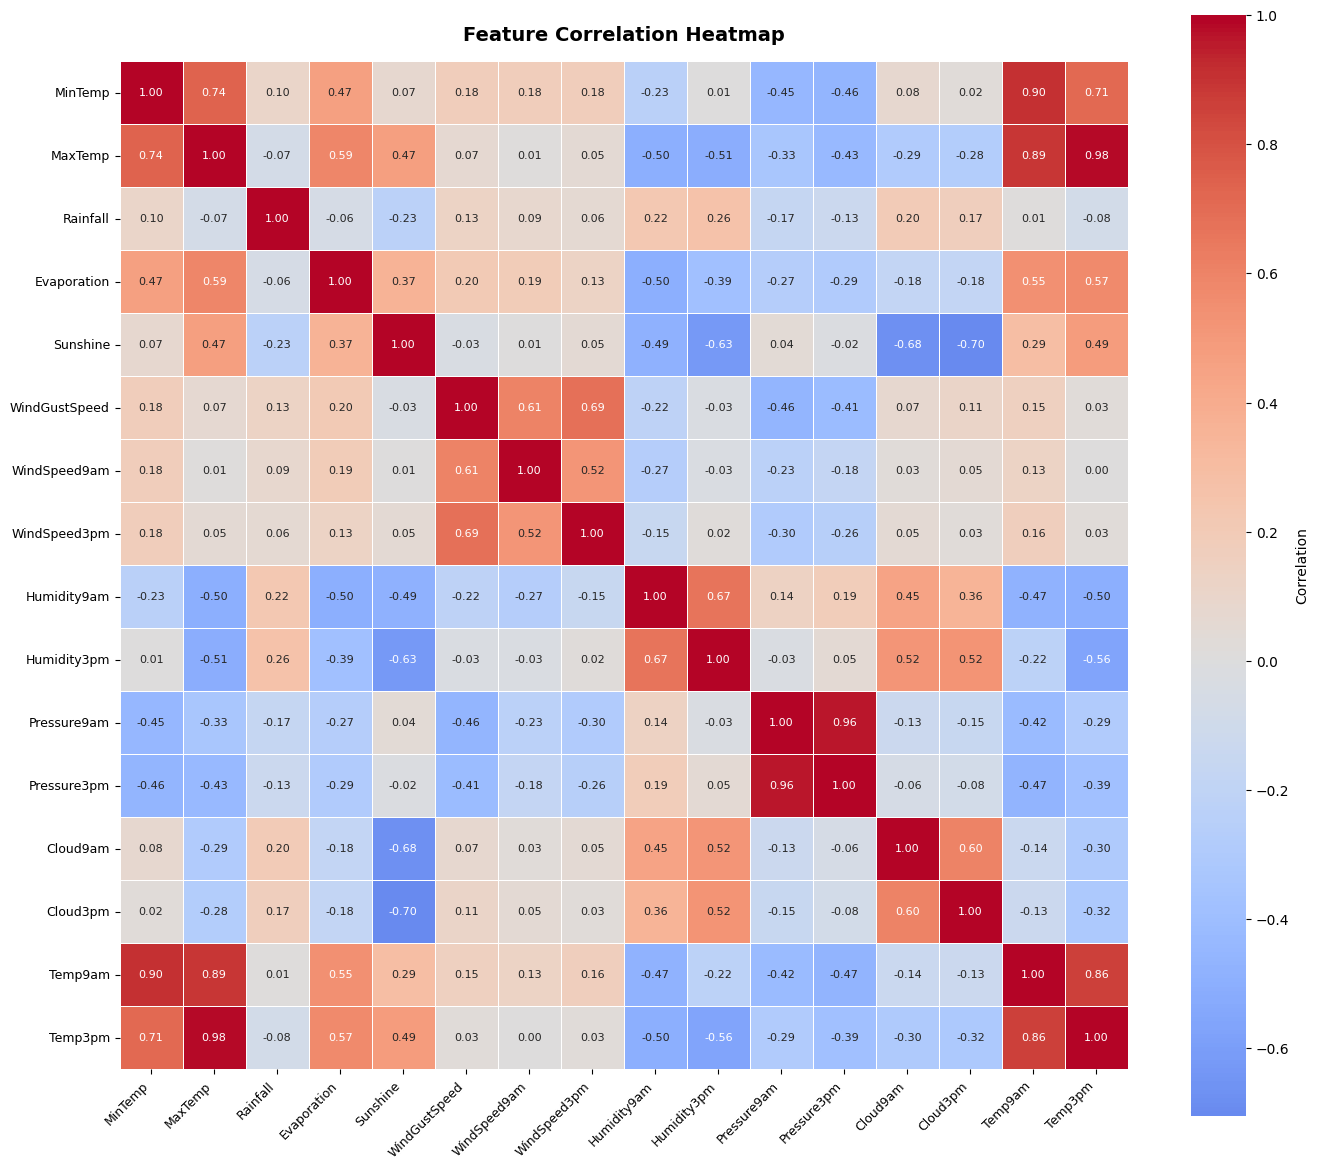

In [15]:
if len(numerical_cols) > 0:

    # Correlation heatmap WITH NUMBERS
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(correlation_matrix, 
                annot=True,              # Changed to True to show numbers
                fmt='.2f',               # Format numbers to 2 decimal places
                cmap='coolwarm', 
                center=0,
                square=True, 
                linewidths=0.5, 
                cbar_kws={'label': 'Correlation'},
                annot_kws={'size': 8})   # Font size for numbers
    ax.set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=15)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.tight_layout()
    plt.show()

 

In [16]:
# ===== 7. CATEGORICAL FEATURES ANALYSIS =====
print("\n" + "="*80)
print("7. CATEGORICAL FEATURES ANALYSIS")
print("="*80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

if len(categorical_cols) > 0: 
    for col in categorical_cols[:6]:  # Show first 6
        print(f"\n{col} - Value counts:")
        print(df[col].value_counts().head(10))



7. CATEGORICAL FEATURES ANALYSIS
Categorical columns (7): ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Date - Value counts:
Date
2017-06-24    49
2017-06-23    49
2017-06-22    49
2017-06-21    49
2017-06-20    49
2017-06-19    49
2017-06-18    49
2017-06-17    49
2017-06-16    49
2017-06-15    49
Name: count, dtype: int64

Location - Value counts:
Location
Canberra       3436
Sydney         3344
Adelaide       3193
Darwin         3193
Hobart         3193
Perth          3193
Melbourne      3193
Brisbane       3193
Albury         3040
MountGinini    3040
Name: count, dtype: int64

WindGustDir - Value counts:
WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
Name: count, dtype: int64

WindDir9am - Value counts:
WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
Name: co

In [17]:
# ===== 8. DATA SUMMARY =====
print("\n" + "="*80)
print("8. FINAL DATA INSPECTION SUMMARY")
print("="*80)
print(f"Total rows: {len(df):,}")
print(f"Total columns: {df.shape[1]}")
print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"Missing values: {df.isnull().sum().sum():,}")
print(f"Duplicate rows: {df.duplicated().sum():,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*80)
print("DATA VISUALIZATION & INSPECTION COMPLETE")
print("="*80)



8. FINAL DATA INSPECTION SUMMARY
Total rows: 145,460
Total columns: 23
Numerical columns: 16
Categorical columns: 7
Missing values: 343,248
Duplicate rows: 0
Memory usage: 68.88 MB

DATA VISUALIZATION & INSPECTION COMPLETE


In [18]:
# ===== COMPLETE DATA CLEANING & PREPROCESSING PIPELINE =====

print("="*80)
print("DATA CLEANING & PREPROCESSING PIPELINE")
print("="*80)

# ===== STEP 1: DROP UNNECESSARY COLUMNS =====
print("\n" + "="*80)
print("STEP 1: REMOVING UNNECESSARY COLUMNS")
print("="*80)

columns_to_drop = ['Date', 'Location']
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_cols_to_drop)
print(f"Dropped columns: {existing_cols_to_drop}")
print(f"Shape after dropping: {df.shape}")


DATA CLEANING & PREPROCESSING PIPELINE

STEP 1: REMOVING UNNECESSARY COLUMNS
Dropped columns: ['Date', 'Location']
Shape after dropping: (145460, 21)


In [19]:
# ===== STEP 2: IDENTIFY COLUMN TYPES =====
print("\n" + "="*80)
print("STEP 2: IDENTIFYING COLUMN TYPES")
print("="*80)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if 'RainTomorrow' in numerical_cols:
    numerical_cols.remove('RainTomorrow')
if 'RainTomorrow' in categorical_cols:
    categorical_cols.remove('RainTomorrow')

if 'RainToday' in numerical_cols:
    numerical_cols.remove('RainToday')
if 'RainToday' in categorical_cols:
    categorical_cols.remove('RainToday')

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")



STEP 2: IDENTIFYING COLUMN TYPES
Numerical columns (16): ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical columns (3): ['WindGustDir', 'WindDir9am', 'WindDir3pm']


In [20]:

# ===== STEP 3: HANDLE HIGH MISSING COLUMNS =====
print("\n" + "="*80)
print("STEP 3: HANDLING COLUMNS WITH HIGH MISSING VALUES")
print("="*80)

missing_pct = (df.isnull().sum() / len(df)) * 100
high_missing = missing_pct[missing_pct > 40].sort_values(ascending=False)

if len(high_missing) > 0:
    print(f"Columns with >40% missing values:")
    for col, pct in high_missing.items():
        print(f"  - {col}: {pct:.2f}%")
    
    print(f"\nDropping {len(high_missing)} columns with >40% missing data...")
    df = df.drop(columns=high_missing.index.tolist())
    
    numerical_cols = [col for col in numerical_cols if col not in high_missing.index]
    categorical_cols = [col for col in categorical_cols if col not in high_missing.index]
    
    print(f"Shape after dropping high missing columns: {df.shape}")
else:
    print("No columns with >40% missing values found")



STEP 3: HANDLING COLUMNS WITH HIGH MISSING VALUES
Columns with >40% missing values:
  - Sunshine: 48.01%
  - Evaporation: 43.17%
  - Cloud3pm: 40.81%

Dropping 3 columns with >40% missing data...
Shape after dropping high missing columns: (145460, 18)


In [21]:
# ===== STEP 4: IMPUTE MISSING VALUES ===== median/mode =====
print("\n" + "="*80)
print("STEP 4: IMPUTING MISSING VALUES")
print("="*80)

print(f"Missing values before imputation:")
missing_before = df.isnull().sum()
missing_before = missing_before[missing_before > 0]
if len(missing_before) > 0:
    print(missing_before)
else:
    print("No missing values found")

if len(numerical_cols) > 0:
    print(f"\nImputing {len(numerical_cols)} numerical columns with MEDIAN...")
    num_imputer = SimpleImputer(strategy='median')
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
    print("[SUCCESS] Numerical imputation complete")

if len(categorical_cols) > 0:
    print(f"\nImputing {len(categorical_cols)} categorical columns with MODE...")
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_value = df[col].mode()[0]
            missing_count = df[col].isnull().sum()
            df[col] = df[col].fillna(mode_value)
            print(f"  - {col}: Filled {missing_count} values with '{mode_value}'")
    print("[SUCCESS] Categorical imputation complete")

print(f"\nMissing values after imputation: {df.isnull().sum().sum()}")



STEP 4: IMPUTING MISSING VALUES
Missing values before imputation:
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Imputing 13 numerical columns with MEDIAN...
[SUCCESS] Numerical imputation complete

Imputing 3 categorical columns with MODE...
  - WindGustDir: Filled 10326 values with 'W'
  - WindDir9am: Filled 10566 values with 'N'
  - WindDir3pm: Filled 4228 values with 'SE'
[SUCCESS] Categorical imputation complete

Missing values after imputation: 6528


In [22]:
# ===== STEP 5: HANDLE DUPLICATES =====
print("\n" + "="*80)
print("STEP 5: REMOVING DUPLICATE ROWS")
print("="*80)

duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")
    print(f"Shape after removing duplicates: {df.shape}")
else:
    print("No duplicates found")



STEP 5: REMOVING DUPLICATE ROWS
Duplicate rows found: 297
Removed 297 duplicate rows
Shape after removing duplicates: (145163, 18)


In [23]:
#===== STEP 6: ENCODE CATEGORICAL VARIABLES =====
print("\n" + "="*80)
print("STEP 6: ENCODING CATEGORICAL VARIABLES")
print("="*80)

binary_cols = []
multi_category_cols = []

for col in categorical_cols:
    if df[col].nunique() == 2:
        binary_cols.append(col)
    else:
        multi_category_cols.append(col)

if 'RainTomorrow' in df.columns and df['RainTomorrow'].dtype == 'object':
    if df['RainTomorrow'].nunique() == 2:
        binary_cols.append('RainTomorrow')

print(f"Binary categorical columns ({len(binary_cols)}): {binary_cols}")
print(f"Multi-category columns ({len(multi_category_cols)}): {multi_category_cols}")

if len(binary_cols) > 0:
    print("\nLabel encoding binary columns...")
    le = LabelEncoder()
    for col in binary_cols:
        df[col] = le.fit_transform(df[col])
        unique_values = df[col].unique()
        print(f"  - {col}: Encoded to {unique_values}")

if len(multi_category_cols) > 0:
    print(f"\nOne-hot encoding {len(multi_category_cols)} multi-category columns...")
    print(f"Columns to encode: {multi_category_cols}")
    
    original_shape = df.shape
    df = pd.get_dummies(df, columns=multi_category_cols, dtype=int)
    
    print(f"[SUCCESS] One-hot encoding complete")
    print(f"Shape changed from {original_shape} to {df.shape}")
    print(f"Added {df.shape[1] - original_shape[1]} new columns")



STEP 6: ENCODING CATEGORICAL VARIABLES
Binary categorical columns (1): ['RainTomorrow']
Multi-category columns (3): ['WindGustDir', 'WindDir9am', 'WindDir3pm']

Label encoding binary columns...
  - RainTomorrow: Encoded to [0 1 2]

One-hot encoding 3 multi-category columns...
Columns to encode: ['WindGustDir', 'WindDir9am', 'WindDir3pm']
[SUCCESS] One-hot encoding complete
Shape changed from (145163, 18) to (145163, 63)
Added 45 new columns


In [24]:
# ===== STEP 7: CHECK FOR ALL-ZERO ROWS IN ONE-HOT ENCODED COLUMNS =====
print("\n" + "="*80)
print("STEP 7: VERIFYING ONE-HOT ENCODING INTEGRITY")
print("="*80)

one_hot_prefixes = [col.rsplit('_', 1)[0] for col in multi_category_cols]
for prefix in set(one_hot_prefixes):
    encoded_cols = [col for col in df.columns if col.startswith(prefix + '_')]
    if encoded_cols:
        all_zero_rows = (df[encoded_cols].sum(axis=1) == 0).sum()
        print(f"{prefix}: {all_zero_rows} rows with all zeros")

print("[SUCCESS] One-hot encoding verification complete")



STEP 7: VERIFYING ONE-HOT ENCODING INTEGRITY
WindGustDir: 0 rows with all zeros
WindDir3pm: 0 rows with all zeros
WindDir9am: 0 rows with all zeros
[SUCCESS] One-hot encoding verification complete


In [25]:
# ===== STEP 8: HANDLE OUTLIERS =====
print("\n" + "="*80)
print("STEP 8: HANDLING OUTLIERS (CAPPING METHOD)")
print("="*80)

numerical_cols_to_cap = [col for col in df.columns 
                         if df[col].dtype in ['float64', 'int64'] 
                         and df[col].nunique() > 2
                         and col != 'RainTomorrow']

print(f"Numerical columns to cap ({len(numerical_cols_to_cap)}): {numerical_cols_to_cap}")

outliers_capped = 0
for col in numerical_cols_to_cap:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    if outliers_before > 0:
        outliers_capped += outliers_before
        print(f"  - {col}: Capped {outliers_before} outliers")

print(f"\n[SUCCESS] Total outliers capped: {outliers_capped}")



STEP 8: HANDLING OUTLIERS (CAPPING METHOD)
Numerical columns to cap (13): ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm']
  - MinTemp: Capped 2776 outliers
  - MaxTemp: Capped 2862 outliers
  - Rainfall: Capped 1449 outliers
  - WindGustSpeed: Capped 2203 outliers
  - WindSpeed9am: Capped 1362 outliers
  - WindSpeed3pm: Capped 2421 outliers
  - Humidity9am: Capped 1425 outliers
  - Humidity3pm: Capped 2802 outliers
  - Pressure9am: Capped 2871 outliers
  - Pressure3pm: Capped 2874 outliers
  - Cloud9am: Capped 2 outliers
  - Temp9am: Capped 2830 outliers
  - Temp3pm: Capped 2882 outliers

[SUCCESS] Total outliers capped: 28759


In [26]:
# ===== STEP 9: SEPARATE FEATURES AND TARGET =====
print("\n" + "="*80)
print("STEP 9: SEPARATING FEATURES AND TARGET")
print("="*80)

if all(col in df.columns for col in ['RainTomorrow', 'RainToday']):
    X = df.drop(['RainTomorrow', 'RainToday'], axis=1)
    y = df[['RainTomorrow', 'RainToday']]
    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}")
    print(f"\nTarget distribution:")
    print(y.value_counts())
    print(f"Class imbalance ratio: {y.value_counts().iloc[0]/y.value_counts().iloc[1]:.2f}:1")
else:
    X = df.copy()
    y = None
    print("No 'RainTomorrow' or 'RainToday' columns found. Using all data as features.")
    print(f"Features (X) shape: {X.shape}")



STEP 9: SEPARATING FEATURES AND TARGET


Features (X) shape: (145163, 61)
Target (y) shape: (145163, 2)

Target distribution:
RainTomorrow  RainToday
0             No           92682
              Yes          16858
1             No           16604
              Yes          14597
2             No             985
              Yes            425
Name: count, dtype: int64
Class imbalance ratio: 5.50:1


In [27]:
y.head()

,RainTomorrow,RainToday
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No


In [28]:
# ===== STEP 10: STANDARDIZE NUMERICAL FEATURES =====
print("\n" + "="*80)
print("STEP 10: STANDARDIZING NUMERICAL FEATURES")
print("="*80)

cols_to_standardize = [col for col in X.columns 
                       if X[col].dtype in ['float64', 'int64'] 
                       and X[col].nunique() > 2]

print(f"Columns to standardize ({len(cols_to_standardize)}): {cols_to_standardize}")

if len(cols_to_standardize) > 0:
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_standardize] = scaler.fit_transform(X[cols_to_standardize])
    
    print("\n[SUCCESS] Standardization complete")
    print(f"Standardized features - Sample statistics:")
    print(X_scaled[cols_to_standardize].describe().loc[['mean', 'std']].round(3))
else:
    X_scaled = X.copy()
    print("No columns to standardize")



STEP 10: STANDARDIZING NUMERICAL FEATURES
Columns to standardize (13): ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm']

[SUCCESS] Standardization complete
Standardized features - Sample statistics:
      MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
mean      0.0     -0.0       0.0            0.0           0.0          -0.0   
std       1.0      1.0       1.0            1.0           1.0           1.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Temp9am  \
mean         -0.0         -0.0          0.0         -0.0       0.0     -0.0   
std           1.0          1.0          1.0          1.0       1.0      1.0   

      Temp3pm  
mean     -0.0  
std       1.0  
